# Sec1: Implementing Artificial Neuron

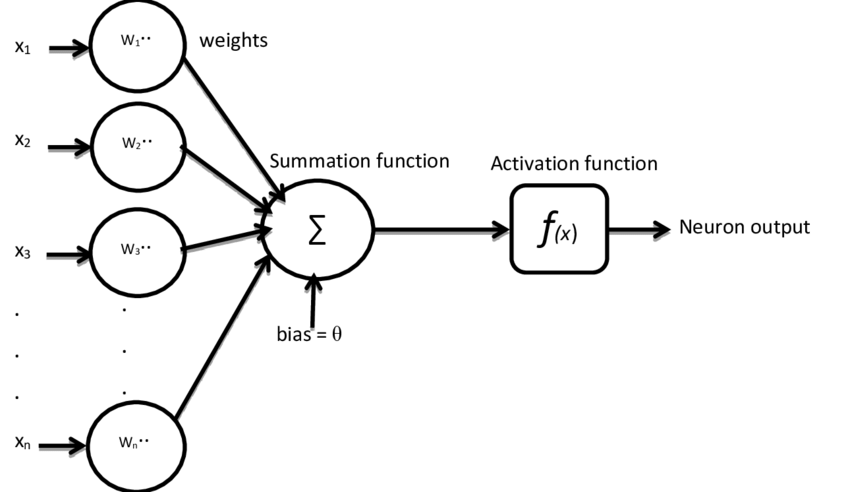

## Sec1.1: Simple neuron

### Inputs, Weights and Bias

In [1]:
import torch

x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

w = torch.tensor([1., 0.5, 1., -1., -0.5])

b = torch.tensor(1.)

### Activation function (Linear)

In [2]:
def linear(x):
  return x

### ### Activation function (Heaviside)

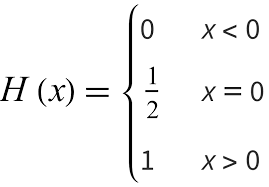

In [3]:
def step(x):
  if x > 0:
    y = torch.tensor(1.)
  elif x < 0:
    y = torch.tensor(0.)
  else:
    y = torch.tensor(0.5)
  return y

#### Torch.heaviside

In [4]:
torch.heaviside(torch.tensor(0.), torch.tensor(5.5))

tensor(5.5000)

### Neuron Function

In [5]:
def neuron(x, w, b, af):
  z = 0
  for xi, wi in zip(x, w): # it just chooses one sample!!!
    z += xi * wi
  z += b
  y = af(z)
  return y

In [6]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [7]:
neuron(x[0], w, b, step)

tensor(0.)

## Sec1.2: Simple neuron (Vectorization)

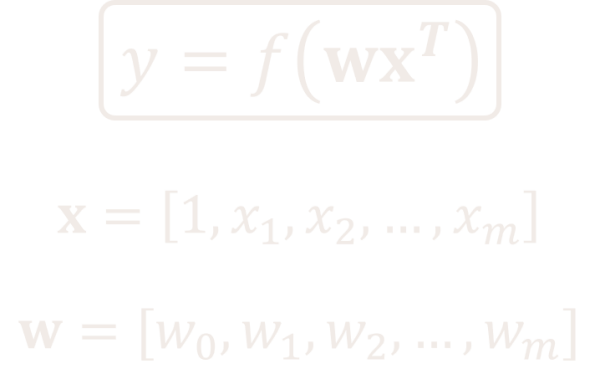

In [8]:
def neuron(x, w, b, af):
  y = af(x @ w + b)
  return y

In [9]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [10]:
neuron(x[0], w, b, step)

tensor(0.)

## Sec1.3: Simple neuron (Class + Vectorization)

In [11]:
class Neuron():
  def __init__(self, m, af):
    self.w = torch.randn(m)
    self.b = torch.randn(1)
    self.af = af

  def __call__(self, x):
    y = self.af(self.w @ x + self.b)
    return y

In [12]:
neuron2 = Neuron(5, linear)

In [13]:
print(neuron2, neuron2.w, neuron2.b)

<__main__.Neuron object at 0x7f3d29f816c0> tensor([ 1.7812, -0.6030,  1.2977, -0.0231,  1.2355]) tensor([0.3583])


In [14]:
neuron2(x[0])

tensor([2.0764])

# Sec2: Loss Functions

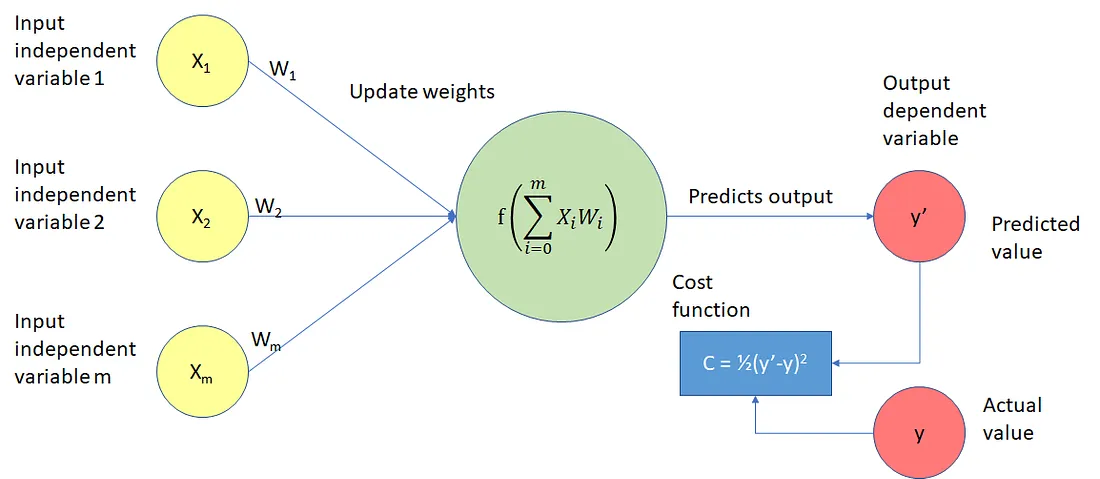

In [15]:
import torch
from torch import nn
import torch.nn.functional as F

In [16]:
yp = torch.tensor([-0.39, -0.47,  0.61, -0.75,  0.31, -0.54,  0.61, -2.83, 1.24,  0.10])

yt = torch.tensor([-0.39,  1.00,  0.51, -0.85,  0.31, -0.04,  1.01, -0.55, 1.24,  0.10])

## Mean Squared Error (MSE)
\begin{align}
MSE &= \frac{1}{n} \sum_{i=1}^n (y_{p_i}-y_{t_i})^2
\end{align}

In [17]:
torch.mean((yp - yt)**2)

tensor(0.7789)

In [18]:
mse = nn.MSELoss()
mse(yp, yt)

tensor(0.7789)

In [19]:
F.mse_loss(yp, yt)

tensor(0.7789)

## Mean Absolute Error (MAE)
\begin{align}
MAE &= \frac{1}{n} \sum_{i=1}^n |y_{p_i}-y_{t_i}|
\end{align}

### From scratch

In [20]:
mae = ...

### MAE class in pytorch

In [20]:
mae = nn.L1Loss()
mae(yp, yt)

tensor(0.4850)

### MAE function in pytorch

In [21]:
F.l1_loss(yp, yt)

tensor(0.4850)

## Connect Neuron to Loss func

In [23]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m)
      self.b = torch.randn(1)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [24]:
neuron = Neuron(5, 'linear')

In [25]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

In [26]:
yp = neuron(x[0])

#e = F.mse_loss(yp, yt)

e = F.mse_loss(yp, yt)
e

<ipython-input-26-4dcd6dcacb77>:5: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  e = F.mse_loss(yp, yt)


tensor(9.8653)

In [27]:
yp = neuron(x[0])

#e = F.mse_loss(yp, yt)

e = F.mse_loss(yp, yt[0])
e

<ipython-input-27-6cb9f9c3e7bb>:5: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  e = F.mse_loss(yp, yt[0])


tensor(9.1986)

In [28]:
yp.size(), yt[0].size()

(torch.Size([1]), torch.Size([]))

In [29]:
yp.size(), yt[[0]].size()

(torch.Size([1]), torch.Size([1]))

In [30]:
yp.size(), yt[:1].size()

(torch.Size([1]), torch.Size([1]))

In [31]:
yp = neuron(x[0])

#e = F.mse_loss(yp, yt)

e = F.mse_loss(yp, yt[[0]]) #or Squeeze, or yt[0:1]
e

tensor(9.1986)

# Sec3: Implementing Gradient Descent (Student choices)

# Sec4: Pytorch Autograd

## https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
https://pytorch.org/docs/stable/autograd.html

## Visualization

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [33]:
def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

In [34]:
def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=120,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

## Find the minimum of $ f(x) = x^{2} $ with pytorch autograd `backward`

In [38]:
x = torch.tensor(3., requires_grad=True)
y = x**2
print(y)
y.backward()
x.grad

tensor(9., grad_fn=<PowBackward0>)


tensor(6.)

### Implement gradient descent

In [36]:
def funcx2(x):
  return x**2

### Gradient descent

In [41]:
def gradient_descent(func, xi, eta, N):
  for iter in range(N):
    func(xi).backward()
    xi.data -= eta * xi.grad
    xi.grad.zero_()
  return xi

In [42]:
xi = torch.tensor(2., requires_grad=True)
eta = 0.1
N = 50
gradient_descent(funcx2, xi, eta, N)

tensor(2.8545e-05, requires_grad=True)

In [43]:
xi = torch.tensor(2., requires_grad=True)
eta = 0.1
N = 50
x = torch.linspace(-4., 4, 100)

animate(x, funcx2, None, xi, eta, N)

# Sec5: connect the Neuron to the grad function

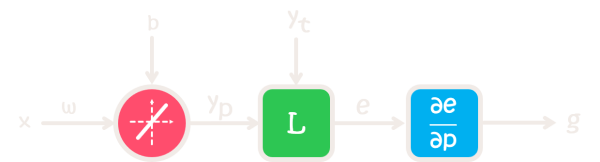

### Imports

In [44]:
import torch
import torch.nn.functional as F

### Input & target

In [45]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [46]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [47]:
neuron = Neuron(5, 'linear')

In [48]:
neuron.w

tensor([-0.5403,  0.0529,  2.5993, -2.5288, -0.0281], requires_grad=True)

In [49]:
yp = neuron(x[0])

### From Section 2

In [50]:
e = F.mse_loss(yp, yt[[0]])

In [51]:
e

tensor(143.2938, grad_fn=<MseLossBackward0>)

### Now calculate the gradient of `(w,b)`

In [52]:
e.backward()

In [53]:
neuron.w.grad

tensor([-23.9411, -47.8822,  -0.0000, -95.7643, -23.9411])

In [54]:
neuron.b.grad

tensor([-23.9411])

#Sec6: Optimization in pytorch

In [55]:
import torch
from torch import optim

## Find the minimum of $ f(x) = x^{2} $

In [60]:
def funcx2(x):
  return x**2

In [57]:
xi = torch.tensor(-3., requires_grad=True)

In [58]:
params = [xi]
eta = 0.1
optimizer = optim.SGD(params, eta)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [61]:
N = 50 # Lets code

for iter in range(N):
    funcx2(xi).backward()
    optimizer.step()
    optimizer.zero_grad()

In [62]:
xi

tensor(-4.2817e-05, requires_grad=True)

## Now connect optimzier to the train block diagram!

### Imports

In [63]:
import torch
import torch.nn.functional as F
from torch import optim

### Input & target

In [64]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [65]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [66]:
neuron = Neuron(5, 'linear')

In [67]:
yp = neuron(x[0])

### From Section 2

In [68]:
e = F.mse_loss(yp, yt[[0]])
e

tensor(3.9315, grad_fn=<MseLossBackward0>)

### From Section 4

In [69]:
e.backward()

In [70]:
neuron.w.grad, neuron.b.grad

(tensor([ -3.9656,  -7.9312,  -0.0000, -15.8624,  -3.9656]), tensor([-3.9656]))

### Now add optimizer!

In [71]:
params = [neuron.w, neuron.b]
eta = 0.1
optimizer = optim.SGD(params, eta)

In [72]:
optimizer.step()
optimizer.zero_grad()

### Final

In [73]:
for iter in range(50):
  yp = neuron(x[0])
  e = F.mse_loss(yp, yt[0].unsqueeze(0))
  e.backward()
  optimizer.step()
  optimizer.zero_grad()

# Sec7: MLP

In [67]:
import torch
from torch import nn

## Example 1: single neuron

In [68]:
fc = nn.Linear(in_features=5, out_features=1)

In [69]:
fc.bias

Parameter containing:
tensor([-0.3368], requires_grad=True)

In [70]:
fc.weight

Parameter containing:
tensor([[-0.2712, -0.2268,  0.2269, -0.2230, -0.0014]], requires_grad=True)

In [71]:
x = torch.randn(100, 5)
x.shape

torch.Size([100, 5])

In [72]:
fc(x).shape

torch.Size([100, 1])

## Example 2: fully connected layer (perceptron layer)

In [73]:
fc = nn.Linear(4, 5, bias=False)

In [74]:
x = torch.tensor([[94., 69, 33, 42],
                  [66, 72, 21, 99],
                  [98, 59, 54, 38],
                  [60, 86, 37, 21],
                  [29, 65, 41, 78],
                  [56,  5, 99, 11]])  #shape[6,4]

In [75]:
fc(x).shape

torch.Size([6, 5])

In [76]:
fc.bias

## Example 3: MLP

In [74]:
x = torch.tensor([[  6.,   9,   5],
                  [ -1,  -10,   5],
                  [  2,   -1,  -9],
                  [  3,    1,   1]]) #[n_sample=4, n_feature=3]

In [76]:
fc1 = nn.Linear(3, 8) #check the features!!!
fc2 = nn.Linear(8, 5, bias=False)

In [78]:
fc1(x).shape

torch.Size([4, 8])

In [77]:
fc2(fc1(x))

tensor([[ 0.9869,  0.7373, -2.9600,  1.6292,  1.2685],
        [-2.5526,  1.1564,  2.9569, -3.2823,  1.1708],
        [-0.0819,  0.2925, -0.8530,  1.7320, -0.0280],
        [-0.2780,  0.7314, -0.7633,  0.3280,  0.8785]], grad_fn=<MmBackward0>)

In [79]:
mlp = nn.Sequential(nn.Linear(3, 8),
                    nn.Linear(8, 5))
mlp

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=5, bias=True)
)

In [80]:
mlp(x)

tensor([[-0.0760,  1.8352, -0.5240, -2.0749, -0.2689],
        [ 0.0216, -0.6200, -0.4524,  1.9482,  2.4151],
        [ 0.7176, -0.0684,  0.0025,  2.1231, -0.8408],
        [ 0.1827,  0.6282, -0.3568,  0.2191,  0.3006]],
       grad_fn=<AddmmBackward0>)

In [82]:
mlp[0].weight.shape

torch.Size([8, 3])

In [82]:
mlp[0].weight

Parameter containing:
tensor([[-0.0822,  0.4862, -0.4368],
        [-0.1156, -0.1646,  0.4429],
        [-0.2938, -0.2447,  0.4117],
        [-0.4655, -0.0458,  0.4138],
        [ 0.4072, -0.2681, -0.2721],
        [-0.3430, -0.2642, -0.3137],
        [-0.2666,  0.2974, -0.4529],
        [-0.1900,  0.2354,  0.2674]], requires_grad=True)

In [83]:
mlp[1].weight

Parameter containing:
tensor([[ 0.1366,  0.0468, -0.1189,  0.3066,  0.2886, -0.1366,  0.1477, -0.0104],
        [-0.1617, -0.2034, -0.2071, -0.3381, -0.1081,  0.3026, -0.3002, -0.1044],
        [-0.2783, -0.1491, -0.0534, -0.3160, -0.2047,  0.3469,  0.0755,  0.3033],
        [ 0.0135, -0.2836,  0.3043,  0.0515, -0.1689, -0.2679,  0.1492, -0.2496],
        [-0.2342, -0.1148,  0.0149,  0.2322,  0.0946, -0.2498, -0.0181, -0.0579]],
       requires_grad=True)

# Sec8: MLP (Regression + Classification) + Train ---> next notebooks